In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('../dataset/train.csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [6]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
os = RandomOverSampler(sampling_strategy='auto', random_state=0)

In [8]:
new=train

In [9]:
y=new['is_promoted']
new.drop('is_promoted',axis=1,inplace=True)


In [10]:
x=new

In [11]:
x_train,y_train=os.fit_resample(x,y)

In [12]:
data =pd.concat([x_train,y_train],axis=1)

In [13]:
data = data.sample(frac=1).reset_index(drop=True)

# DataSet info

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100280 entries, 0 to 100279
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   employee_id           100280 non-null  int64  
 1   department            100280 non-null  object 
 2   region                100280 non-null  object 
 3   education             96777 non-null   object 
 4   gender                100280 non-null  object 
 5   recruitment_channel   100280 non-null  object 
 6   no_of_trainings       100280 non-null  int64  
 7   age                   100280 non-null  int64  
 8   previous_year_rating  92930 non-null   float64
 9   length_of_service     100280 non-null  int64  
 10  awards_won?           100280 non-null  int64  
 11  avg_training_score    100280 non-null  int64  
 12  is_promoted           100280 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 9.9+ MB


<AxesSubplot:>

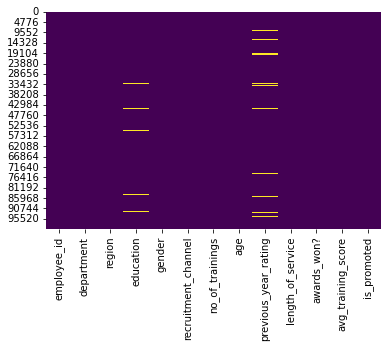

In [15]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:xlabel='department', ylabel='count'>

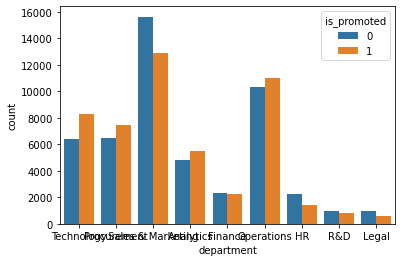

In [16]:
sns.countplot(x='department',hue='is_promoted',data=data)

<AxesSubplot:xlabel='education', ylabel='length_of_service'>

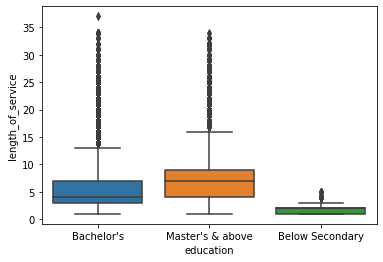

In [17]:
sns.boxplot(x='education',y='length_of_service',
                data=data)

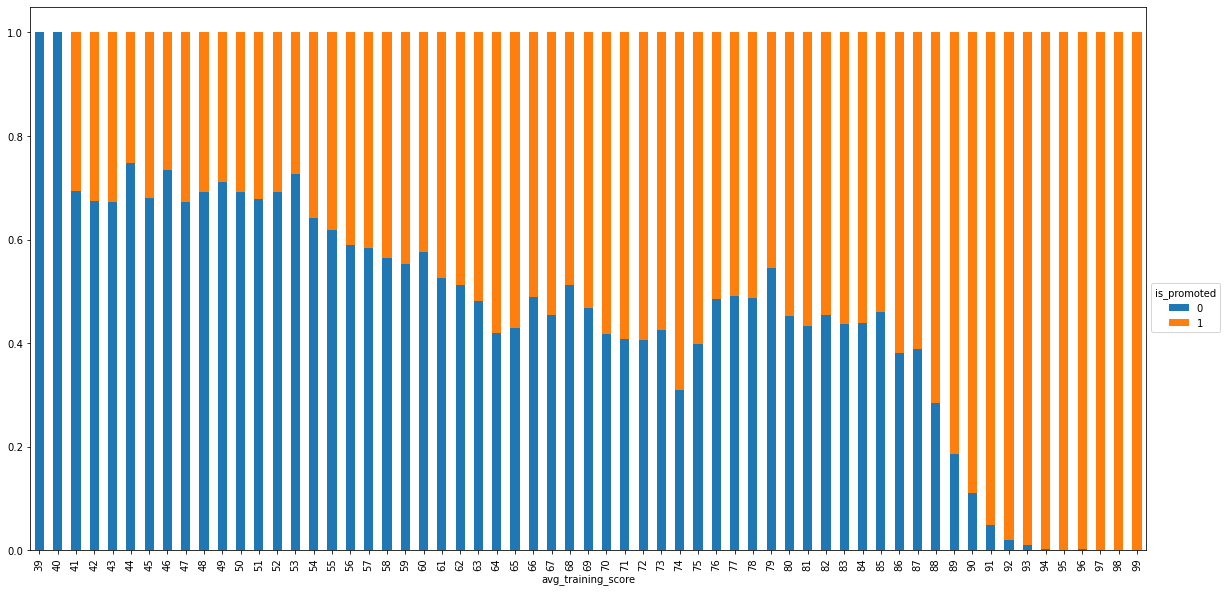

In [18]:
plt.rcParams['figure.figsize'] = [20, 10]
score_bin = pd.crosstab(data.avg_training_score,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [19]:
def inpute_education(cols):
    education=cols[0]
    length_of_service=cols[1]
    if pd.isnull(education):
        if length_of_service <4:
            return 'Below Secondary'
        elif length_of_service <6:
            return "Bachelor's"
        else:
            return "Master's & above"
    else:
        return education
       

In [20]:
data['education']=data[['education','length_of_service']].apply(inpute_education,axis=1)

In [21]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

<AxesSubplot:>

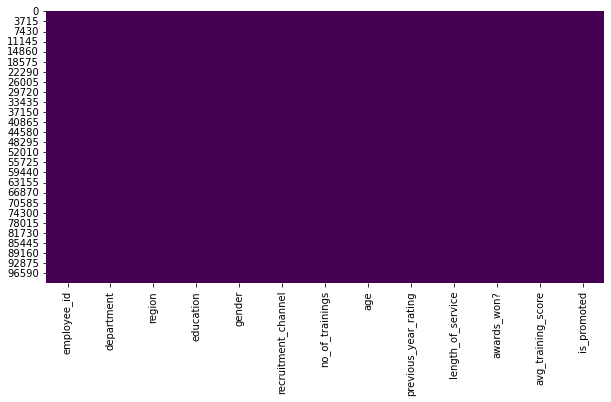

In [22]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [23]:
department=pd.get_dummies(data['department'],drop_first=True)

In [24]:
education=pd.get_dummies(data['education'],drop_first=True)

In [25]:
recruitment_channel=pd.get_dummies(data['recruitment_channel'],drop_first=True)

In [26]:
result =pd.concat([data,department,education,recruitment_channel],axis=1)
# result =pd.concat([data,education,recruitment_channel],axis=1)

In [27]:
result.drop(['gender','employee_id','region','department','education','recruitment_channel'],axis=1,inplace=True)


In [28]:
new=result

In [29]:
promoted=result[result['is_promoted']==1]
not_promoted=result[result['is_promoted']==0]

In [30]:
y=new['is_promoted']
new.drop('is_promoted',axis=1,inplace=True)

In [31]:
x=new

In [32]:
y

0         1
1         1
2         1
3         0
4         0
         ..
100275    1
100276    1
100277    0
100278    0
100279    1
Name: is_promoted, Length: 100280, dtype: int64

In [33]:
result

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,1,30,5.0,4,0,80,0,0,0,0,0,0,0,1,0,0,0,1
1,1,32,4.0,8,0,88,0,0,0,0,1,0,0,0,0,0,0,0
2,1,27,3.0,1,0,83,0,0,0,0,0,0,0,1,0,0,0,0
3,1,25,2.0,2,0,81,0,0,0,0,0,0,0,1,0,0,0,1
4,1,27,3.0,2,0,52,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100275,1,31,3.0,3,0,80,0,0,0,0,0,0,0,1,0,0,1,0
100276,1,27,5.0,3,0,51,0,1,0,0,0,0,0,0,0,0,0,1
100277,1,26,3.0,2,0,50,0,0,0,0,0,0,1,0,0,0,0,1
100278,1,26,3.0,2,0,50,0,0,0,0,0,0,1,0,0,0,0,1


In [34]:
x

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,1,30,5.0,4,0,80,0,0,0,0,0,0,0,1,0,0,0,1
1,1,32,4.0,8,0,88,0,0,0,0,1,0,0,0,0,0,0,0
2,1,27,3.0,1,0,83,0,0,0,0,0,0,0,1,0,0,0,0
3,1,25,2.0,2,0,81,0,0,0,0,0,0,0,1,0,0,0,1
4,1,27,3.0,2,0,52,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100275,1,31,3.0,3,0,80,0,0,0,0,0,0,0,1,0,0,1,0
100276,1,27,5.0,3,0,51,0,1,0,0,0,0,0,0,0,0,0,1
100277,1,26,3.0,2,0,50,0,0,0,0,0,0,1,0,0,0,0,1
100278,1,26,3.0,2,0,50,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

##  LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
logistci_model = LogisticRegression(solver='lbfgs', max_iter=100000)

In [39]:
logistci_model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [40]:
filename = 'overSampleLogisticRegression_model.sav'
pickle.dump(logistci_model, open(filename, 'wb'))

In [75]:
train_scores = cross_val_score(
        logistci_model, x_train, y_train, scoring="accuracy", cv=5
    )
test_scores = cross_val_score(
        logistci_model, x_test, y_test, scoring="accuracy", cv=5
    )

(0.65, 0.76)

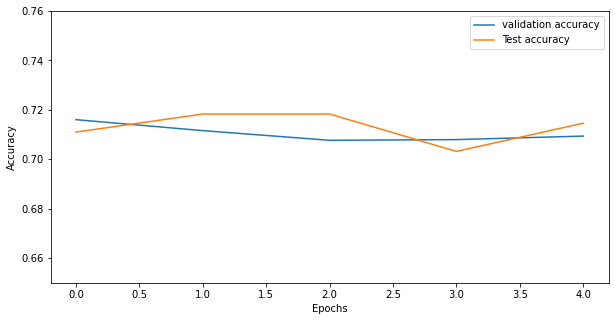

In [76]:
plt.plot(train_scores,label='validation accuracy')
plt.plot(test_scores,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.65,0.76])

In [43]:
filename = 'overSampleLogisticRegression_model.sav'
pickle.dump(logistci_model, open(filename, 'wb'))

In [44]:
predictions=logistci_model.predict(x_test)

In [45]:
predictions

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

# LogisticRegression Accuracy

In [46]:
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

Confusion Matrix


[[11572  3511]
 [ 5123  9878]]


              precision    recall  f1-score   support

           0       0.69      0.77      0.73     15083
           1       0.74      0.66      0.70     15001

    accuracy                           0.71     30084
   macro avg       0.72      0.71      0.71     30084
weighted avg       0.72      0.71      0.71     30084



In [47]:
confusion_matrix(y_test,predictions)

array([[11572,  3511],
       [ 5123,  9878]], dtype=int64)

# KNN

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scalar=StandardScaler()

In [50]:
kx=x
ky=y

In [51]:
scalar.fit(kx)

StandardScaler()

In [52]:
scaled_features=scalar.transform(kx)

In [53]:
df_feat=pd.DataFrame(scaled_features,columns=kx.columns)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(kx,ky,test_size=0.3,random_state=42)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_model=KNeighborsClassifier(n_neighbors=2)

In [57]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [118]:
pred=knn_model.predict(x_test)

In [77]:
train_scores = cross_val_score(
        knn_model, x_train, y_train, scoring="accuracy", cv=5
    )
test_scores = cross_val_score(
        knn_model, x_test, y_test, scoring="accuracy", cv=5
    )

(0.8, 1.0)

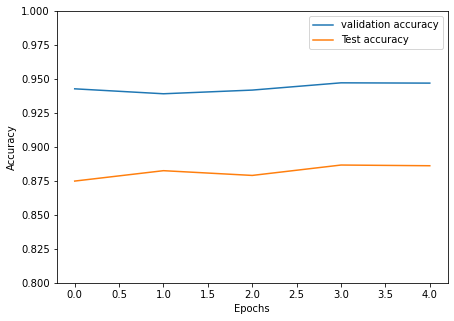

In [113]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(train_scores,label='validation accuracy')
plt.plot(test_scores,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8,1])

array([0.85448505, 0.85315615, 0.85315615, 0.84451827, 0.84773936,
       0.87034574, 0.83710106, 0.86303191, 0.85704787, 0.8537234 ,
       0.85571809, 0.83776596, 0.85505319, 0.88297872, 0.86236702,
       0.85704787, 0.85571809, 0.84308511, 0.82779255, 0.86303191])

# KNN Accuracy 

In [119]:
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix


[[34637   420]
 [ 1125 34014]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35057
           1       0.99      0.97      0.98     35139

    accuracy                           0.98     70196
   macro avg       0.98      0.98      0.98     70196
weighted avg       0.98      0.98      0.98     70196



In [226]:
filename = 'overSampleKNN_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))

In [62]:
p_y=promoted['is_promoted']
promoted.drop('is_promoted',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
p_pred=knn_model.predict(promoted)

In [69]:
p_pred[:1000]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
n_y=not_promoted['is_promoted']
not_promoted.drop('is_promoted',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
n_pred=knn_model.predict(not_promoted)
n_pred[:1000]

In [74]:
n_pred[:1000]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtree_model =DecisionTreeClassifier()

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [83]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
pred=dtree_model.predict(x_test)

In [108]:
train_scores = cross_val_score(
        dtree_model, x_train, y_train, scoring="accuracy", cv=5
    )
test_scores = cross_val_score(
        dtree_model, x_test, y_test, scoring="accuracy", cv=5
    )

(0.8, 1.0)

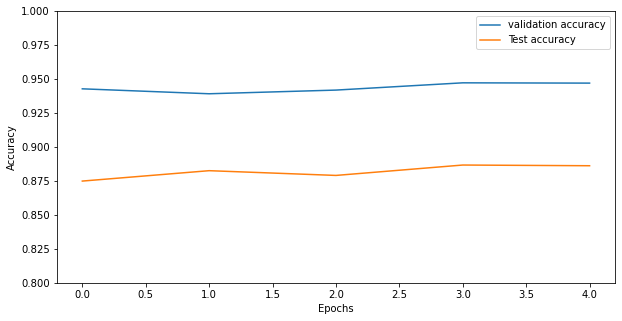

In [109]:
plt.plot(train_scores,label='validation accuracy')
plt.plot(test_scores,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8,1])

# Decision Tree Accuracy

In [87]:
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix


[[13616  1467]
 [   30 14971]]


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     15083
           1       0.91      1.00      0.95     15001

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084



<AxesSubplot:>

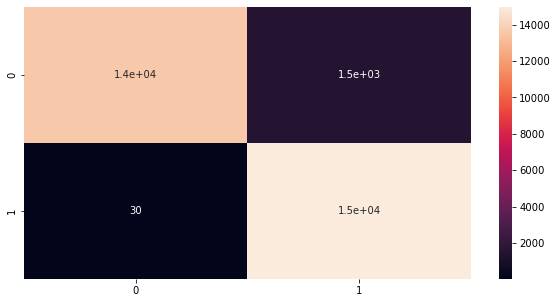

In [88]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [89]:
filename = 'overSampleDecisionTree_model.sav'
pickle.dump(dtree_model, open(filename, 'wb'))

In [106]:
n_pred=dtree_model.predict(not_promoted)
n_pred[n_pred==0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# K Means Clustering

In [235]:
from sklearn.cluster import KMeans

In [236]:
kmeans_model=KMeans(n_clusters=2)

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [238]:
kmeans_model.fit(x_train,y_train)

KMeans(n_clusters=2)

In [ ]:
train_scores = cross_val_score(
        kmeans_model, x_train, y_train, scoring="accuracy", cv=20
    )
test_scores = cross_val_score(
        kmeans_model, x_test, y_test, scoring="accuracy", cv=20
    )

In [ ]:
plt.plot(train_scores,label='validation accuracy')
plt.plot(test_scores,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.6,0.7])

In [239]:
# print(confusion_matrix(y_train,kmeans_model.labels_))
# print(classification_report(y_train,kmeans_model.labels_))

In [240]:
pred=kmeans_model.predict(x_test)

# K Means Clustering Accuracy

In [241]:
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix


[[10171  4861]
 [ 6697  8355]]


              precision    recall  f1-score   support

           0       0.60      0.68      0.64     15032
           1       0.63      0.56      0.59     15052

    accuracy                           0.62     30084
   macro avg       0.62      0.62      0.61     30084
weighted avg       0.62      0.62      0.61     30084



In [242]:
filename = 'overSampleKMeansClustering_model.sav'
pickle.dump(kmeans_model, open(filename, 'wb'))

# Support Vector Machine

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
pred=svc_model.predict(x_test)

In [ ]:
train_scores = cross_val_score(
        svc_model, x_train, y_train, scoring="accuracy", cv=20
    )
test_scores = cross_val_score(
        svc_model, x_test, y_test, scoring="accuracy", cv=20
    )

In [ ]:
plt.plot(train_scores,label='validation accuracy')
plt.plot(test_scores,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.6,0.7])

# Support Vector Machine Accuracy

In [ ]:
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
filename = 'overSampleSupportVectorMachine_model.sav'
pickle.dump(svc_model, open(filename, 'wb'))